In [10]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())
import pickle
from testsuite.utilities import Pareto_split
import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# plt.style.use('seaborn')
# import matplotlib.cm as cm
from testsuite.analysis import plot_pareto_2d

(20, 2)
[]


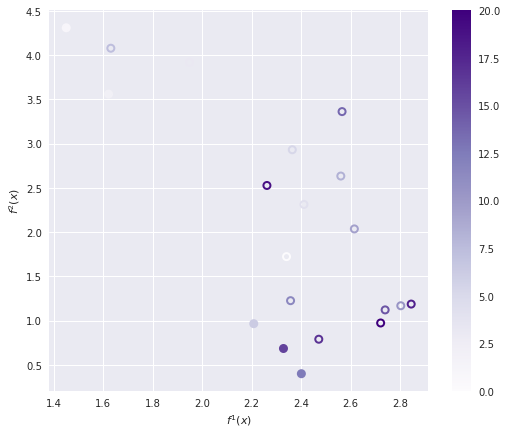

In [11]:
filename = "wfg2_SmsEgo_init10_MultiSurrogate_GP_smsego_ei_000.pkl"
log_path = os.path.join(rootpath.detect(), "analytics/basic_optimisation/log_data/wfg2_SmsEgo_init10_MultiSurrogate_GP_smsego_ei/", filename)

result_saf = pickle.load(open(log_path, "rb"))
fig = plot_pareto_2d(result_saf)
print(result_saf["y"].shape)
print(result_saf["errors"])

(110, 2)
[]


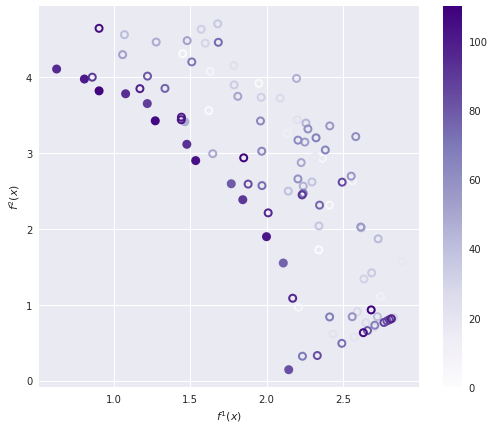

In [12]:
filename = "wfg2_SmsEgo_init10_MultiSurrogate_GP_smsego_ei_001.pkl"
log_path = os.path.join(rootpath.detect(), "analytics/basic_optimisation/log_data/wfg2_SmsEgo_init10_MultiSurrogate_GP_smsego_ei/", filename)

result_sms = pickle.load(open(log_path, "rb"))
fig = plot_pareto_2d(result_sms)
print(result_sms["y"].shape)
print(result_sms["errors"])

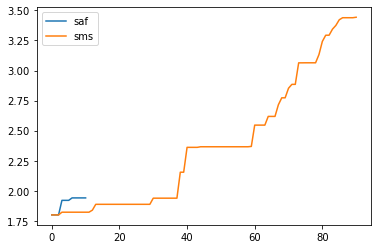

In [111]:
import matplotlib.pyplot as plt
plt.plot(range(len(result_saf["hypervolume"])), result_saf["hypervolume"], label="saf")
plt.plot(range(len(result_sms["hypervolume"])), result_sms["hypervolume"], label="sms")
plt.legend()

In [40]:
result["x"].shape

NameError: name 'result' is not defined

In [ ]:
result["n_evaluations"]

In [ ]:
# len(result["x"])
# result["n_evaluations"]=len(result["x"])-result["n_initial"]
# result["hypervolume"] = result["hypervolume"][:result["n_evaluations"]-result["n_initial"]+1]

In [ ]:
import matplotlib.pyplot as plt
def plot_hypervolume(results, axis=None, labels=None, plot_individuals=False, color="C0"):
    if type(results) is not list:
        results = [results]
        
    if axis is None:
        fig = plt.figure(figsize=[12, 8]) 
        ax = fig.gca()
    
    if plot_individuals:
        HVs = []
        for result in results:
            n_inital = result["n_initial"]
            n_total = result["n_evaluations"]
            
            hypervolume = result["hypervolume"]
            HVs.append(hypervolume)
            x = result["x"]
            
            bo_steps = range(n_inital, n_total+1)
                             
            ax.plot(bo_steps, hypervolume, linestyle=":", c=color, alpha=0.4)
            
        HVs = np.array(HVs)
        ax.plot(bo_steps, HVs.mean(axis=0), linestyle="-", c=color, alpha=1.)
        ax.fill_between(bo_steps, HVs.mean(axis=0)-HVs.std(axis=0), HVs.mean(axis=0)+HVs.std(axis=0),
                        color=color, alpha=0.2)
   
    if axis is None:
        return fig          

In [ ]:
plot_hypervolume([result], plot_individuals=True)